In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("data_file.csv")


In [3]:
df.drop(columns=["FileName", "md5Hash"], inplace=True)


In [4]:
X = df.drop("Benign", axis=1)
y = df["Benign"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    # "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

In [7]:
results = []

for name, model in models.items():
    print(f"\n====== Model: {name} ======")
    
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.time()
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    
    print("Waktu komputasi:", round(end - start, 2), "detik")
    print("Akurasi:", round(acc, 4))
    print("Classification Report:\n", report)
    
    # Untuk rekap summary
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report_dict["weighted avg"]["precision"],
        "Recall": report_dict["weighted avg"]["recall"],
        "F1-Score": report_dict["weighted avg"]["f1-score"],
        "Time (s)": round(end - start, 2)
    })


====== Model: Random Forest ======
Waktu komputasi: 12.19 detik
Akurasi: 0.9968
Classification Report:
               precision    recall  f1-score   support

           0     0.9973    0.9971    0.9972      7125
           1     0.9961    0.9965    0.9963      5372

    accuracy                         0.9968     12497
   macro avg     0.9967    0.9968    0.9967     12497
weighted avg     0.9968    0.9968    0.9968     12497


====== Model: Decision Tree ======
Waktu komputasi: 0.58 detik
Akurasi: 0.9948
Classification Report:
               precision    recall  f1-score   support

           0     0.9962    0.9947    0.9954      7125
           1     0.9929    0.9950    0.9940      5372

    accuracy                         0.9948     12497
   macro avg     0.9946    0.9948    0.9947     12497
weighted avg     0.9948    0.9948    0.9948     12497


====== Model: XGBoost ======


C:\Users\rames\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Waktu komputasi: 1.99 detik
Akurasi: 0.9962
Classification Report:
               precision    recall  f1-score   support

           0     0.9965    0.9968    0.9966      7125
           1     0.9957    0.9953    0.9955      5372

    accuracy                         0.9962     12497
   macro avg     0.9961    0.9961    0.9961     12497
weighted avg     0.9962    0.9962    0.9962     12497



In [8]:
result_df = pd.DataFrame(results)
print("\n======= Ringkasan Hasil =======")
print(result_df)


======= Ringkasan Hasil =======
           Model  Accuracy  Precision    Recall  F1-Score  Time (s)
0  Random Forest  0.996799   0.996799  0.996799  0.996799     12.19
1  Decision Tree  0.994799   0.994802  0.994799  0.994799      0.58
2        XGBoost  0.996159   0.996159  0.996159  0.996159      1.99


C:\Users\rames\AppData\Local\Temp\ipykernel_2684\2455526137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df, y="Model", x="Time (s)", palette="Reds_r")


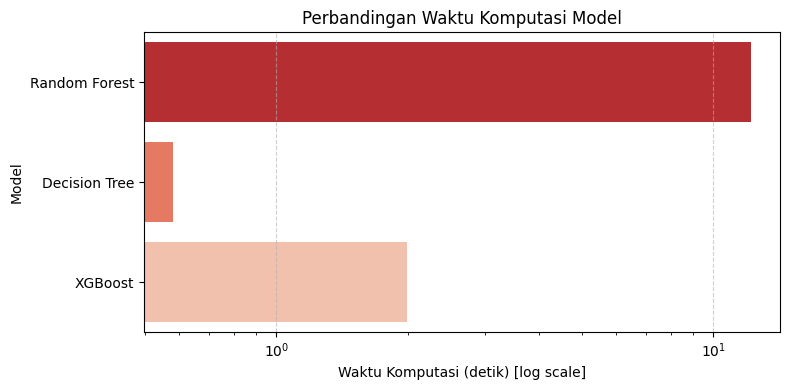

In [9]:
# 1. Waktu Komputasi - Stripplot (Dot)
plt.figure(figsize=(8, 4))
sns.barplot(data=result_df, y="Model", x="Time (s)", palette="Reds_r")
plt.xscale('log')  # Ini bikin skala waktu jadi logaritmik
plt.xlabel("Waktu Komputasi (detik) [log scale]")
plt.ylabel("Model")
plt.title("Perbandingan Waktu Komputasi Model")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\rames\AppData\Local\Temp\ipykernel_2684\3456902818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=result_df, x="Model", y="Accuracy", palette=sns.color_palette("Purples_d"))
C:\Users\rames\AppData\Local\Temp\ipykernel_2684\3456902818.py:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.barplot(data=result_df, x="Model", y="Accuracy", palette=sns.color_palette("Purples_d"))


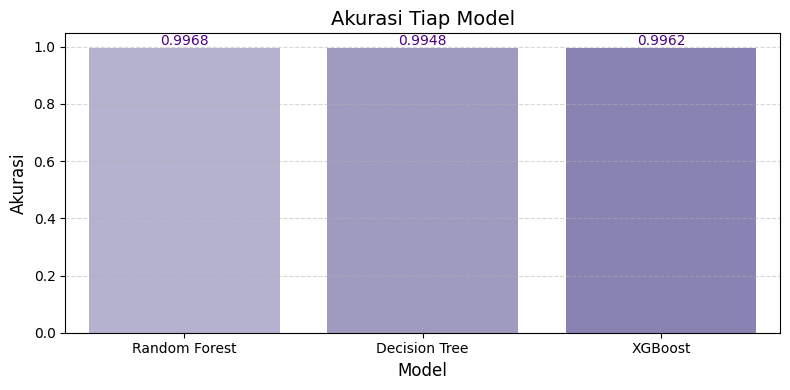

In [10]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=result_df, x="Model", y="Accuracy", palette=sns.color_palette("Purples_d"))

plt.title("Akurasi Tiap Model", fontsize=14)
plt.ylabel("Akurasi", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Tambahkan label angka akurasi di atas bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='#4B0082')

plt.tight_layout()
plt.show()

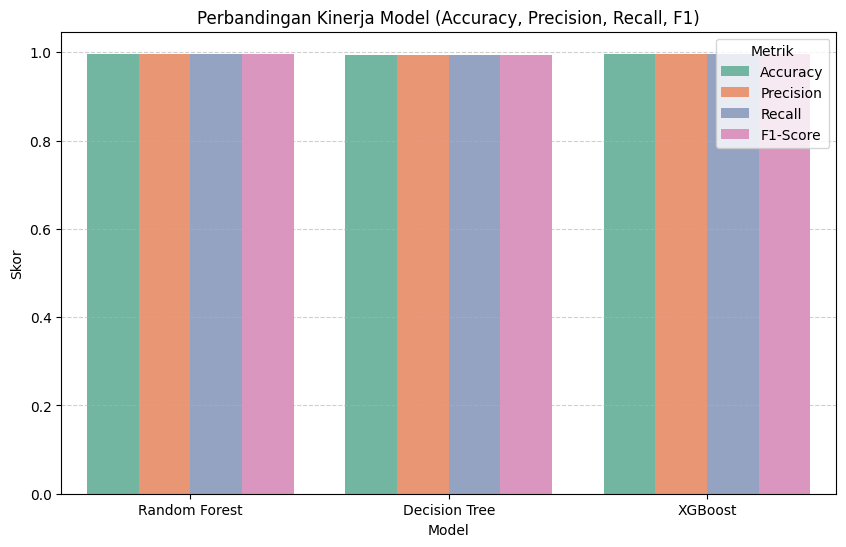

In [11]:
# 3. Perbandingan Kinerja - Grouped Barplot (diletakkan paling akhir)
plt.figure(figsize=(10, 6))
plot_df = result_df.melt(id_vars="Model", value_vars=["Accuracy", "Precision", "Recall", "F1-Score"])
sns.barplot(data=plot_df, x="Model", y="value", hue="variable", palette="Set2")
plt.title("Perbandingan Kinerja Model (Accuracy, Precision, Recall, F1)")
plt.ylabel("Skor")
plt.legend(title="Metrik")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()